# Objective
1. read data
2. analyze data
3. predict customer's satification (4-5:satisfied, 1-3:unsatisfied)

# read data

In [46]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
#data link: https://www.kaggle.com/sid321axn/amazon-alexa-reviews
df=pd.read_csv('amazon_alexa.tsv', delimiter = '\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


# Analyze data

In [47]:
df.shape

(3150, 5)

In [48]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


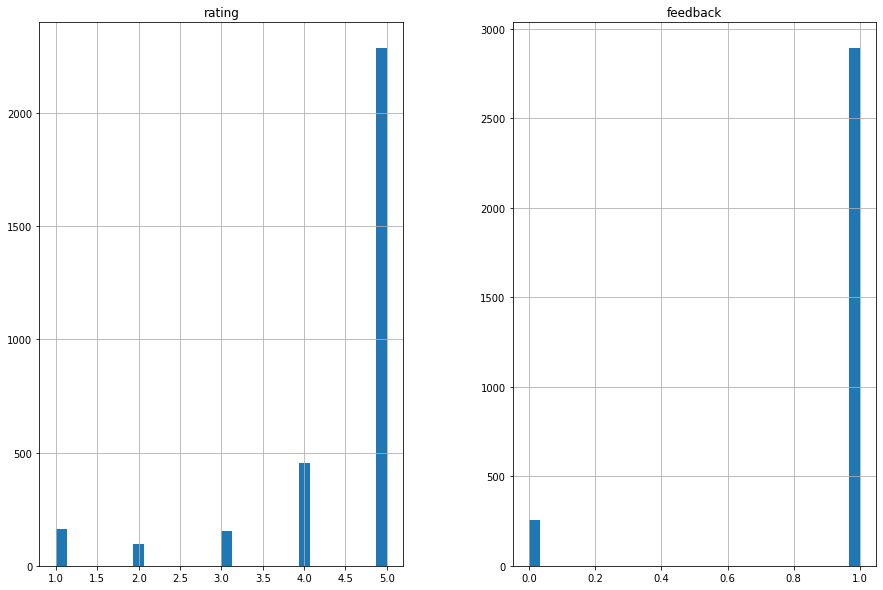

In [50]:
#distribution plot of all numeric data
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import pandas as pd
from pandas import Series, DataFrame
df.hist(bins=30,figsize=(15,10),grid=True);

In [51]:
#find all unique catagorical data
obj=[]
for i in list(df.columns):
  if df[i].dtype == 'O':
    obj.append(i)
    print(i+ ': '+ str(df[i].unique()) +'\n' )

date: ['31-Jul-18' '30-Jul-18' '29-Jul-18' '28-Jul-18' '27-Jul-18' '26-Jul-18'
 '25-Jul-18' '24-Jul-18' '23-Jul-18' '22-Jul-18' '21-Jul-18' '20-Jul-18'
 '19-Jul-18' '18-Jul-18' '17-Jul-18' '16-Jul-18' '15-Jul-18' '14-Jul-18'
 '13-Jul-18' '12-Jul-18' '11-Jul-18' '10-Jul-18' '9-Jul-18' '8-Jul-18'
 '7-Jul-18' '6-Jul-18' '5-Jul-18' '4-Jul-18' '3-Jul-18' '2-Jul-18'
 '1-Jul-18' '30-Jun-18' '29-Jun-18' '28-Jun-18' '27-Jun-18' '26-Jun-18'
 '25-Jun-18' '24-Jun-18' '23-Jun-18' '22-Jun-18' '21-Jun-18' '20-Jun-18'
 '19-Jun-18' '18-Jun-18' '17-Jun-18' '16-Jun-18' '15-Jun-18' '14-Jun-18'
 '13-Jun-18' '12-Jun-18' '11-Jun-18' '10-Jun-18' '9-Jun-18' '8-Jun-18'
 '7-Jun-18' '6-Jun-18' '5-Jun-18' '4-Jun-18' '3-Jun-18' '2-Jun-18'
 '1-Jun-18' '31-May-18' '30-May-18' '29-May-18' '28-May-18' '27-May-18'
 '26-May-18' '25-May-18' '24-May-18' '23-May-18' '22-May-18' '21-May-18'
 '20-May-18' '19-May-18' '18-May-18' '17-May-18' '16-May-18']

variation: ['Charcoal Fabric ' 'Walnut Finish ' 'Heather Gray Fabric '
 '

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


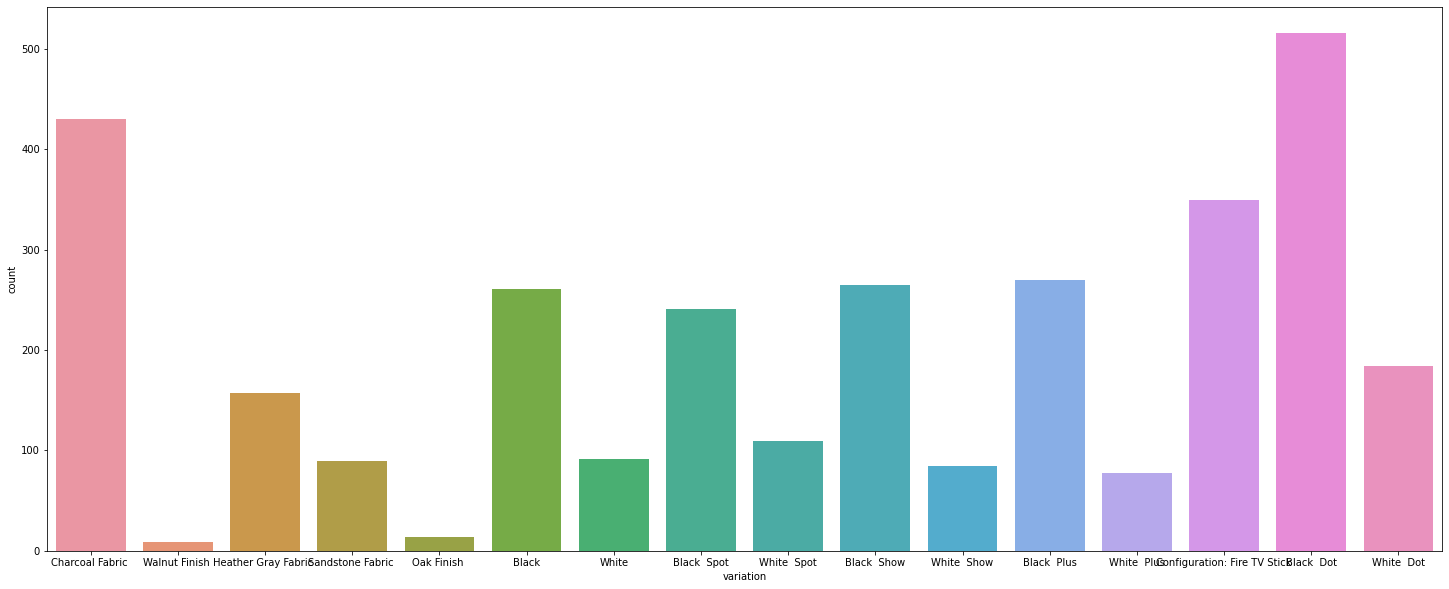

In [52]:
#distribution of 'variation'
plt.figure(figsize=(25,10))
sns.countplot(df['variation'])

In [53]:
new_rating=[]
for i in df['rating']:
  if i in [1,2,3]:
    new_rating.append('bad')
  else:
    new_rating.append('good')
df['new_rating']=pd.Series(new_rating)
df.head()

,rating,date,variation,verified_reviews,feedback,new_rating
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,good
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,good
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,good
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,good
4,5,31-Jul-18,Charcoal Fabric,Music,1,good


In [54]:
df['new_rating'].value_counts()

good    2741
bad      409
Name: new_rating, dtype: int64

# Train a model

In [55]:
#define input and output data

input=df['verified_reviews']
output=df['new_rating']

In [56]:
#split data (train/test)

from sklearn.model_selection import train_test_split
#testing data size is of 20% of entire data
x_train, x_test, y_train, y_test =train_test_split(input,output, test_size = 0.2, random_state =5)

In [57]:
#train model with pipeline

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


clf_pipeline = Pipeline([('vect',CountVectorizer()),
                         ('tfidf',TfidfTransformer()),
                         ('clf',MultinomialNB())])
clf_pipeline.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

# Evaluation

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
accuracy_score(y_test, clf_pipeline.predict(x_test))

0.8476190476190476

In [59]:
print(classification_report(y_test, clf_pipeline.predict(x_test)))

              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        95
        good       0.85      1.00      0.92       535

    accuracy                           0.85       630
   macro avg       0.42      0.50      0.46       630
weighted avg       0.72      0.85      0.78       630



In [60]:
#acc = 0.848 (acceptable !)

# Try the model

In [65]:
#index of 1 bad
list(y_test).index('bad')

10

In [66]:
#example
# 10 = index of 'bad'
for i in [1,3,5,7,10]:
  print( list(x_test)[i])
  print('y_real: ' + str(list(y_test)[i])+ ' y_pred: '+str(list(clf_pipeline.predict(x_test))[i])+'\n')

Have had for just one week so far and I can say it is a blast to have.
y_real: good y_pred: good

The ase of participating with Echo
y_real: good y_pred: good

Nice picture good sound but the mics are not as sensitive as a dot, my dots can hear me from across the house the Show does not, that being said I LOVE the show!!I can watch TV and movies while in tg ed kitchen, have the News playing or Music....love....it !!
y_real: good y_pred: good

Ummm... TV like everyone else.
y_real: good y_pred: good

It's like having another kid in the house; I have to constantly repeat myself.I can tell Alexa to do something clear as day, and according to the history, she hears something comeletely different.The device is really cool, and I like the concept, which is why it gets two stars. However, it just doesn't work as intended.I find myself irritated more often than not when I use this device.
y_real: bad y_pred: good

